# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%load_ext autoreload
%autoreload 2

# Анализ испытуемых

In [2]:
path = os.path.join(os.path.dirname(os.getcwd()), 'src', 'ds003688-download', 'participants.tsv')
participants = pd.read_csv(path, sep='\t')
participants[participants['fMRI'] == 'yes']

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kisnikser/Documents/GitHub/2023-Project-112/src/ds003688-download/participants.tsv'

# Подключение моделей

In [5]:
# видеоряд
from dataloader import FramesLoader
framesloader = FramesLoader()
vector_list = framesloader.get_vector_list()

# снимки фМРТ
from dataloader import Sub

# модели
from models import LinearModel, LinearDeltaModel

# визуализатор
from visualizer import Visualizer

# вспомогательные функции
import utils

# Пример работы

In [6]:
sub = Sub('04')
lin = LinearModel(vector_list, sub, 5, 1, 1000)
lin.fit()
lin.predict()
lin.evaluate()

In [7]:
visualizer = Visualizer(lin)

TEST


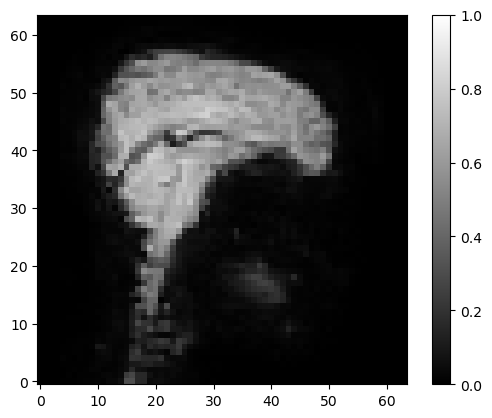

PREDICTED


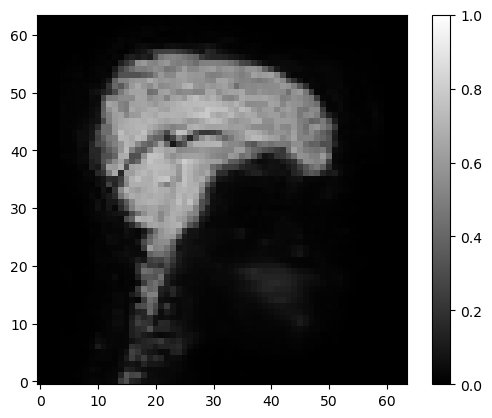

DIFFERENCE


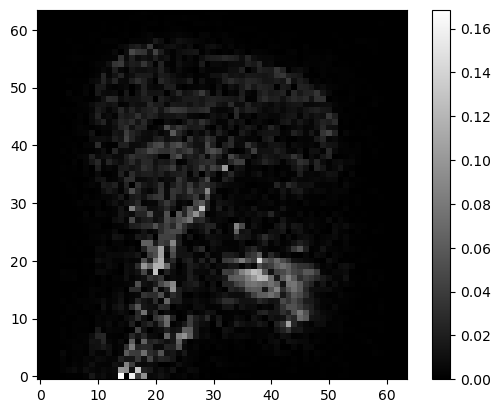

In [8]:
visualizer.show_scan_slices(37, 0, 20)

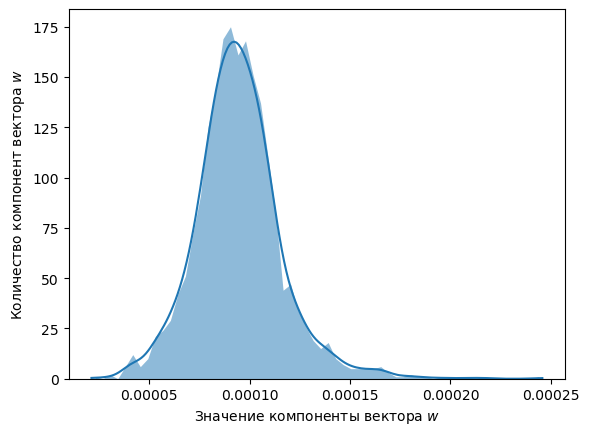

In [9]:
visualizer.show_mean_weight_distribution()

# Графики зависимостей

## Зависимость качества восстановления от времени задержки

### Модель, предсказывающая следующий снимок

In [36]:
t = np.linspace(0, 10, 20)
MSE_matrix = []

for number in Sub.subs_with_fmri[:2]:
    MSE = []
    sub = Sub(number)
    for dt in t:
        lin = LinearModel(vector_list, sub, dt, 8, 0)
        lin.fit()
        lin.predict()
        lin.evaluate()
        MSE.append(lin.MSE_test)
    MSE_matrix.append(MSE)

MSE_matrix = np.array(MSE_matrix)

In [37]:
path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "src", "MSE_dt.npy")
array = np.array([MSE_matrix])
np.save(path, array, allow_pickle=True)

In [38]:
path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "src", "MSE_dt.npy")
MSE_matrix = np.load(path, allow_pickle=True)[0]

In [39]:
MSE_means = MSE_matrix.mean(axis=0)
MSE_stds = MSE_matrix.std(axis=0)

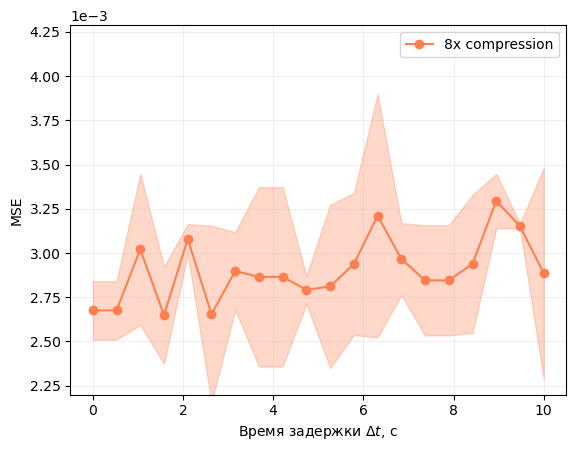

In [40]:
plt.plot(t, MSE_means, marker='o', color="coral", label="8x compression")
plt.fill_between(t, MSE_means - MSE_stds, MSE_means + MSE_stds, color="coral", alpha=0.3)
plt.xlabel("Время задержки $\Delta t$, с")
plt.ylabel("MSE")
plt.ylim(0.7 * abs(MSE_means - MSE_stds).max(), 1.1 * abs(MSE_means + MSE_stds).max())
plt.legend()
plt.ticklabel_format(style="sci", axis='y', scilimits=(0, 0))
plt.grid(alpha=0.2)

#plt.savefig(os.path.join(figures, "subs_MSE_dt.pdf"), bbox_inches="tight")

### Модель, предсказывающая разность между текущим и следующим снимком

In [41]:
t = np.linspace(0, 10, 20)
MSE_matrix = []

for number in Sub.subs_with_fmri[:2]:
    MSE = []
    sub = Sub(number)
    for dt in t:
        lindelta = LinearDeltaModel(vector_list, sub, dt, 8, 1000)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE.append(lindelta.MSE_test)
    MSE_matrix.append(MSE)

MSE_matrix = np.array(MSE_matrix)

In [42]:
path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "src", "delta_MSE_dt.npy")
array = np.array([MSE_matrix])
np.save(path, array, allow_pickle=True)

In [43]:
path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "src", "delta_MSE_dt.npy")
MSE_matrix = np.load(path, allow_pickle=True)[0]

In [44]:
MSE_means = MSE_matrix.mean(axis=0)
MSE_stds = MSE_matrix.std(axis=0)

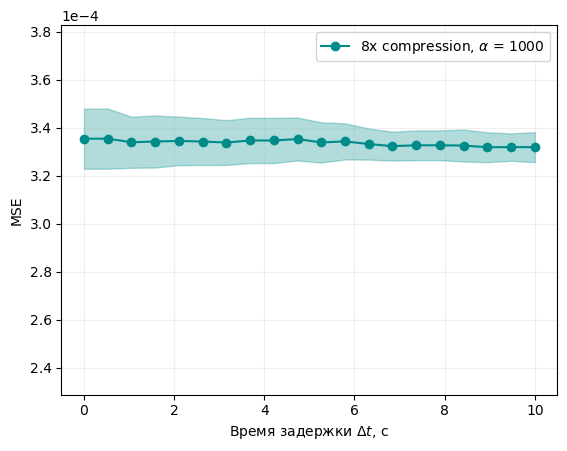

In [45]:
plt.plot(t, MSE_means, marker='o', color="darkcyan", label=r"8x compression, $\alpha$ = 1000")
plt.fill_between(t, MSE_means - MSE_stds, MSE_means + MSE_stds, color="darkcyan", alpha=0.3)
plt.xlabel("Время задержки $\Delta t$, с")
plt.ylabel("MSE")
plt.ylim(0.7 * abs(MSE_means - MSE_stds).max(), 1.1 * abs(MSE_means + MSE_stds).max())
plt.legend()
plt.ticklabel_format(style="sci", axis='y', scilimits=(0, 0))
plt.grid(alpha=0.2)

#plt.savefig(os.path.join(figures, "subs_delta_MSE_dt.pdf"), bbox_inches="tight")

## Зависимость качества восстановления от коэффициента регуляризации

In [130]:
alphas = np.logspace(-3, 8, 12)
MSE_matrix_alpha_8 = []
MSE_matrix_alpha_4 = []
MSE_matrix_alpha_2 = []
MSE_matrix_alpha_1 = []

for number in Sub.subs_with_fmri[:3]:

    MSE_8 = []
    MSE_4 = []
    MSE_2 = []
    MSE_1 = []
    sub = Sub(number)

    for alpha in alphas:

        lindelta = LinearDeltaModel(vector_list, sub, 5, 8, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_8.append(lindelta.MSE_test)

        lindelta = LinearDeltaModel(vector_list, sub, 5, 4, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_4.append(lindelta.MSE_test)

        lindelta = LinearDeltaModel(vector_list, sub, 5, 2, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_2.append(lindelta.MSE_test)

        lindelta = LinearDeltaModel(vector_list, sub, 5, 1, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_1.append(lindelta.MSE_test)

    MSE_matrix_alpha_8.append(MSE_8)
    MSE_matrix_alpha_4.append(MSE_4)
    MSE_matrix_alpha_2.append(MSE_2)
    MSE_matrix_alpha_1.append(MSE_1)

MSE_matrix_alpha_8 = np.array(MSE_matrix_alpha_8)
MSE_matrix_alpha_4 = np.array(MSE_matrix_alpha_4)
MSE_matrix_alpha_2 = np.array(MSE_matrix_alpha_2)
MSE_matrix_alpha_1 = np.array(MSE_matrix_alpha_1)

In [132]:
path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "src", "MSE_alpha.npy")
array = np.array([MSE_matrix_alpha_8, MSE_matrix_alpha_4, MSE_matrix_alpha_2, MSE_matrix_alpha_1], dtype=object)
np.save(path, array, allow_pickle=True)

In [40]:
path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "src", "MSE_alpha.npy")
MSE_matrix_alpha_8, MSE_matrix_alpha_4, MSE_matrix_alpha_2, MSE_matrix_alpha_1 = np.load(path, allow_pickle=True)

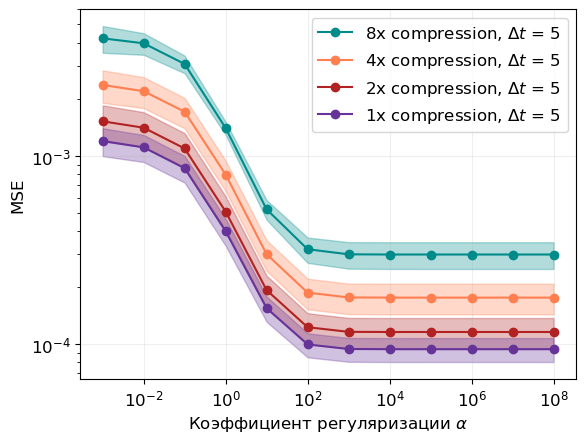

In [43]:
MSE_means_alpha_8 = np.array([vector.mean() for vector in MSE_matrix_alpha_8.T])
MSE_stds_alpha_8 = np.array([vector.std() for vector in MSE_matrix_alpha_8.T])

MSE_means_alpha_4 = np.array([vector.mean() for vector in MSE_matrix_alpha_4.T])
MSE_stds_alpha_4 = np.array([vector.std() for vector in MSE_matrix_alpha_4.T])

MSE_means_alpha_2 = np.array([vector.mean() for vector in MSE_matrix_alpha_2.T])
MSE_stds_alpha_2 = np.array([vector.std() for vector in MSE_matrix_alpha_2.T])

MSE_means_alpha_1 = np.array([vector.mean() for vector in MSE_matrix_alpha_1.T])
MSE_stds_alpha_1 = np.array([vector.std() for vector in MSE_matrix_alpha_1.T])

plt.rcParams.update({'font.size': 12})
plt.rc("font", family='sans-serif')

plt.plot(alphas, MSE_means_alpha_8, marker='o', color="darkcyan", label=r"8x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_8 - MSE_stds_alpha_8, MSE_means_alpha_8 + MSE_stds_alpha_8, color="darkcyan", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_4, marker='o', color="coral", label=r"4x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_4 - MSE_stds_alpha_4, MSE_means_alpha_4 + MSE_stds_alpha_4, color="coral", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_2, marker='o', color="firebrick", label=r"2x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_2 - MSE_stds_alpha_2, MSE_means_alpha_2 + MSE_stds_alpha_2, color="firebrick", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_1, marker='o', color="rebeccapurple", label=r"1x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_1 - MSE_stds_alpha_1, MSE_means_alpha_1 + MSE_stds_alpha_1, color="rebeccapurple", alpha = 0.3)
plt.xlabel("Коэффициент регуляризации $\\alpha$")
plt.ylabel("MSE")
#plt.ylim(0.7 * abs(mse_means - mse_stds).max(), 1.1 * abs(mse_means + mse_stds).max())
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.2)

plt.savefig(os.path.join(figures, "subs_MSE_alpha.pdf"), bbox_inches="tight")

# Проверка адекватности построенной модели

In [46]:
sub4 = Sub('04')
sub7 = Sub('07')

In [47]:
lindelta4 = LinearDeltaModel(vector_list, sub4, 5, 8, 1000)
lindelta7 = LinearDeltaModel(vector_list, sub7, 5, 8, 1000)
mix = LinearDeltaModel(vector_list, sub7, 5, 8, 1000)

In [49]:
lindelta4.fit()
lindelta4.predict()
lindelta4.evaluate()

lindelta7.fit()
lindelta7.predict()
lindelta7.evaluate()

mix.fit()
mix.predict()
mix.evaluate()

In [50]:
Y_test_predicted = mix.repredict(lindelta4.W)
MSE_test = mix.evaluate(Y_test_predicted)
MSE_test

0.00034255204591498897

In [51]:
lindelta7.MSE_test

0.00034220185158522816

In [52]:
visualizer4 = Visualizer(lindelta4)
visualizer7 = Visualizer(lindelta7)

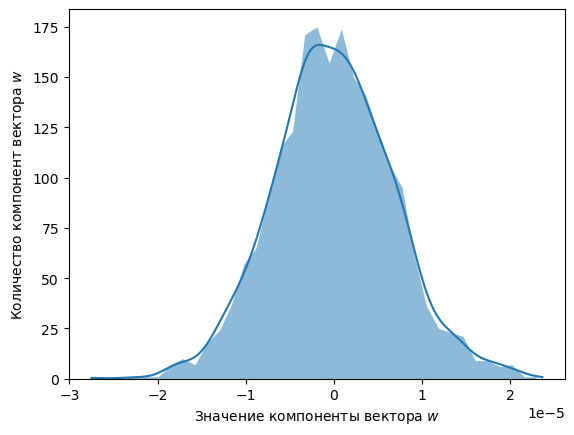

In [53]:
visualizer4.show_mean_weight_distribution()

# Инвариантность весов относительно человека

In [42]:
sub4 = Sub('04')
sub7 = Sub('07')

In [43]:
lindelta4 = LinearDeltaModel(vector_list, sub4, 5, 8, 1000)
lindelta7 = LinearDeltaModel(vector_list, sub7, 5, 8, 1000)
mix = LinearDeltaModel(vector_list, sub7, 5, 8, 1000)

In [44]:
lindelta4.fit()
lindelta4.predict()
lindelta4.evaluate()

lindelta7.fit()
lindelta7.predict()
lindelta7.evaluate()

mix.fit()
mix.predict()
mix.evaluate()

In [45]:
Y_test_predicted = mix.repredict(lindelta4.W)
MSE_test = mix.evaluate(Y_test_predicted)
MSE_test

In [55]:
print(f"Original MSE_test: {lindelta7.MSE_test}")
print(f"Mixed MSE_test: {MSE_test}")
print(f"Difference: {abs(MSE_test - lindelta7.MSE_test)}")

Original MSE_test: 0.00034220185158522816
Mixed MSE_test: 0.00034255204591498897
Difference: 3.5019432976081486e-07


In [56]:
visualizer4 = Visualizer(lindelta4)
visualizer7 = Visualizer(lindelta7)
visualizermix = Visualizer(mix)

TEST


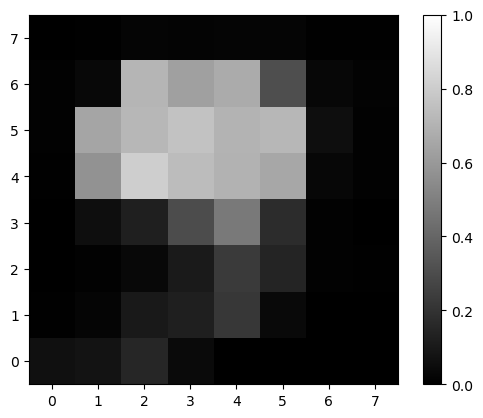

PREDICTED


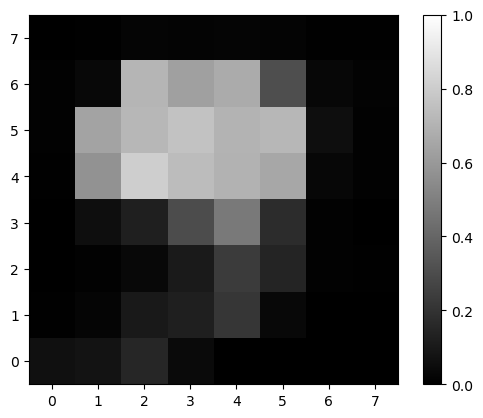

DIFFERENCE


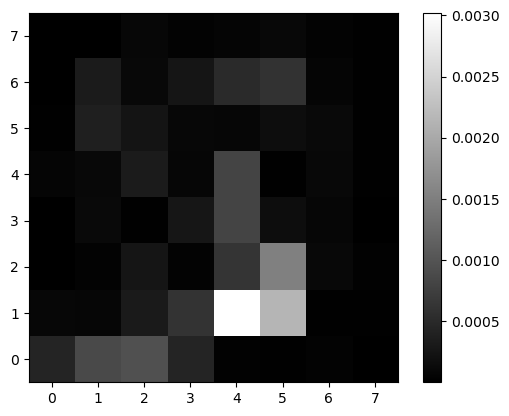

In [58]:
visualizer4.show_scan_slices(100, 0, 4)

TEST


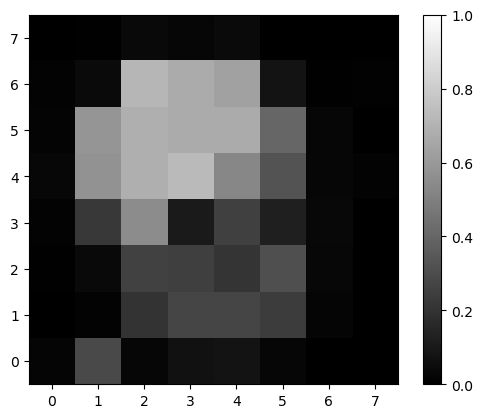

PREDICTED


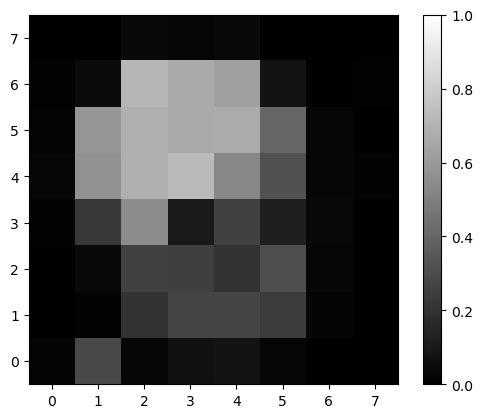

DIFFERENCE


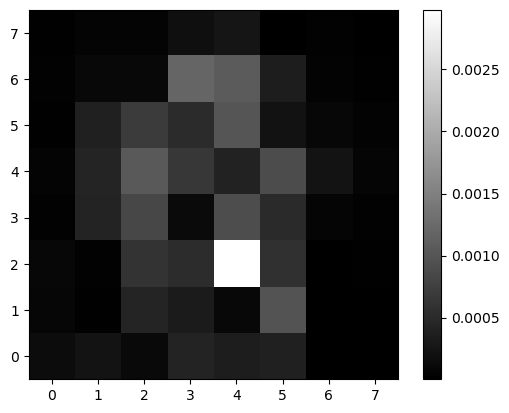

In [59]:
visualizer7.show_scan_slices(100, 0, 4)

TEST


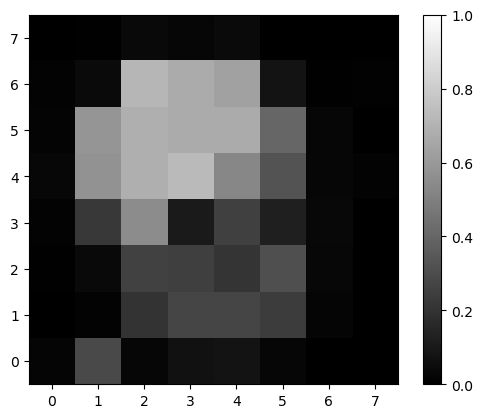

PREDICTED


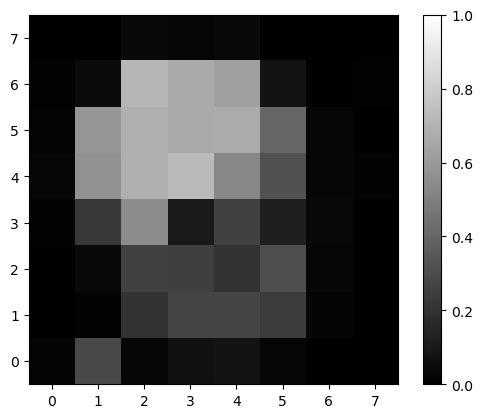

DIFFERENCE


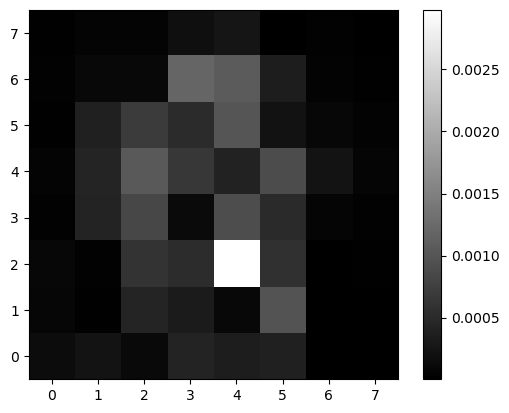

In [60]:
visualizermix.show_scan_slices(100, 0, 4)

# Предсказание по случайному шуму

In [61]:
sub35 = Sub('35')

In [62]:
lindelta35 = LinearDeltaModel(vector_list, sub35, 5, 1, 1000)
noised = LinearDeltaModel(vector_list, sub35, 5, 1, 1000)

In [63]:
lindelta35.fit()
lindelta35.predict()
lindelta35.evaluate()

In [64]:
#X_random_train = np.random.rand(lindeltapred35.X_train.shape[0], lindeltapred35.X_train.shape[1])
#X_random_test = np.random.rand(lindeltapred35.X_test.shape[0], lindeltapred35.X_test.shape[1])

X_random_train = np.ones((lindelta35.X_train.shape[0], lindelta35.X_train.shape[1]))
X_random_test = np.ones((lindelta35.X_test.shape[0], lindelta35.X_test.shape[1]))

In [67]:
noised.deltaY_train_predicted = lindelta35.W @ X_random_train.T
noised.deltaY_test_predicted = lindelta35.W @ X_random_test.T
noised.Y_train_predicted = np.delete(noised.Y_train, -1, 1) + noised.deltaY_train_predicted
noised.Y_test_predicted = np.delete(noised.Y_test, -1, 1) + noised.deltaY_test_predicted
    
noised.MSE_test = noised.evaluate(noised.Y_test_predicted)

In [68]:
lindelta35.MSE_test

0.00015520417920816462

In [69]:
noised.MSE_test

0.0001548960931208396

In [70]:
visualizer35 = Visualizer(lindelta35)
visualizernoised = Visualizer(noised)

TEST


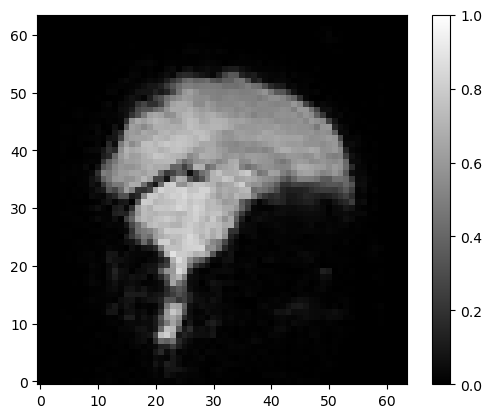

PREDICTED


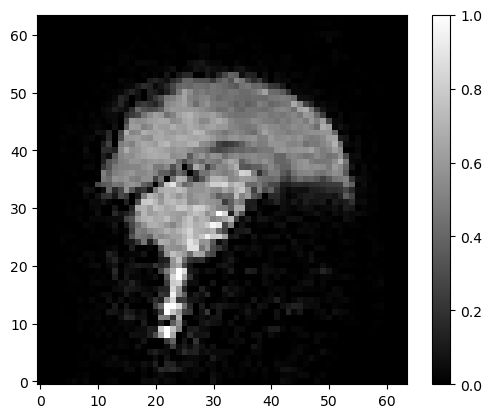

DELTA


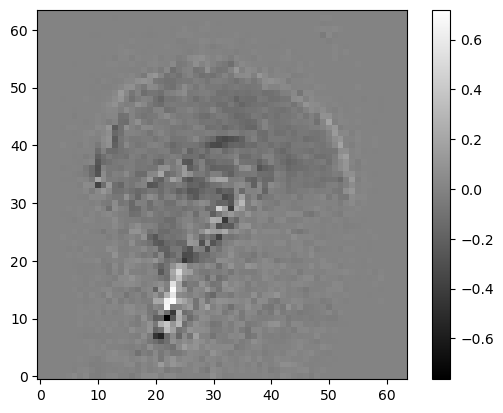

DIFFERENCE


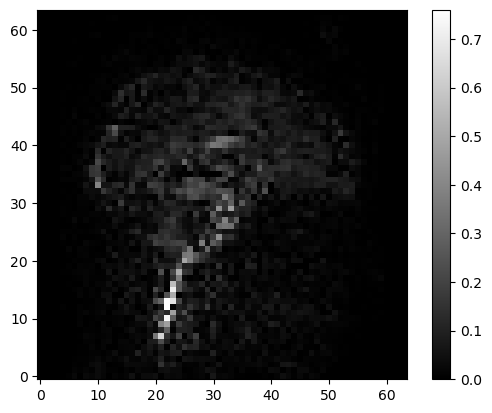

In [71]:
visualizer35.show_recovered_scan_slices(-1, 0, 20)

In [72]:
scan_test = lindelta35.Y_test.T[-1]
scan_predicted = lindelta35.Y_test.T[0] + np.sum(lindelta35.deltaY_test_predicted.T[:-1], axis = 0)

In [73]:
MSE_test = np.linalg.norm(scan_test - scan_predicted) ** 2 / scan_test.shape[0]
MSE_test

0.00205997198922928

TEST


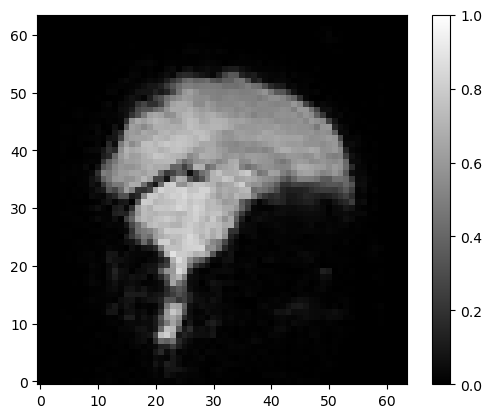

PREDICTED


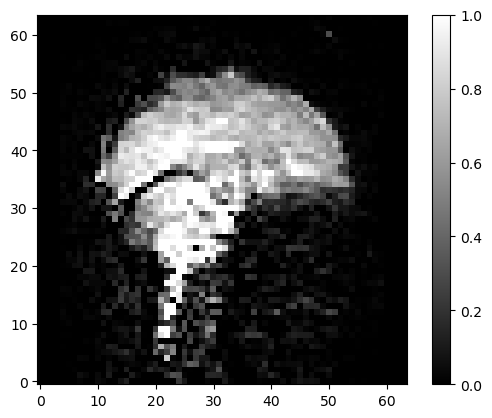

DELTA


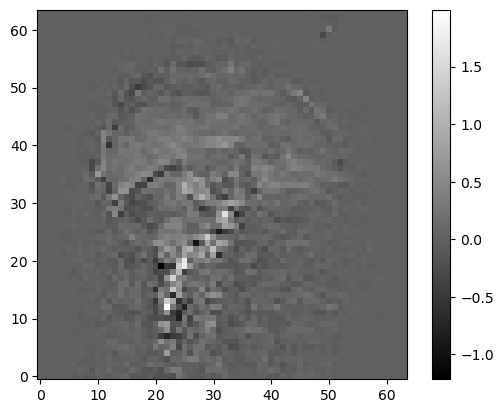

DIFFERENCE


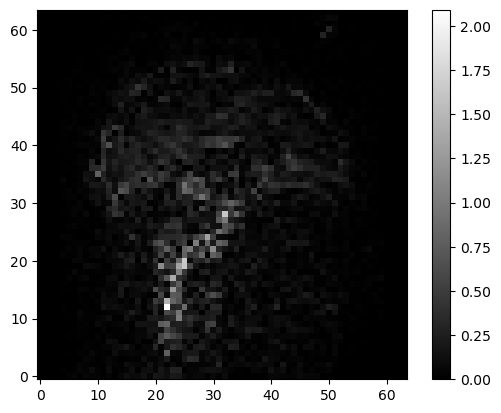

In [74]:
visualizernoised.show_recovered_scan_slices(-1, 0, 20)

In [75]:
scan_test = noised.Y_test.T[-1]
scan_predicted = noised.Y_test.T[0] + np.sum(noised.deltaY_test_predicted.T[:-1], axis = 0)

In [76]:
MSE_test = np.linalg.norm(scan_test - scan_predicted) ** 2 / scan_test.shape[0]
MSE_test

0.011529797586072758

# Матрица ошибок при подмешивании весов

In [19]:
for num in Sub.subs_with_fmri:
    lindelta = LinearDeltaModel(Sub(num), 5, 1, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    utils.save_object(lindelta.W, f"lindelta-W-{num}.pkl")

In [20]:
# i строка - берется i-ый испытуемый и к нему подмешиваются остальные (используются их матрицы весов)
# j столбец - берется j-ый испытуемый и подмешивается к остальным (используется его матрица весов)
errors = np.zeros((len(Sub.subs_with_fmri), len(Sub.subs_with_fmri)))

In [24]:
counter = 0
print(f"The process of filling in the error matrix has started [{counter}/{errors.shape[0] * errors.shape[1]}]\n")

for i in range(errors.shape[0]):
    lindelta = LinearDeltaModel(Sub(Sub.subs_with_fmri[i]), 5, 1, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    for j in range(errors.shape[1]):
        if i == j:
            errors[i][j] = lindelta.MSE_test
        else:
            W = utils.load_object(f"lindeltapred-W-{sub.subs_with_fmri[j]}.pkl")
            errors[i][j] = lindelta.repredict(W)
        counter += 1
        print(f"[{counter}/{errors.shape[0] * errors.shape[1]}]: errors[{i}][{j}] = {errors[i][j]}")

The process of filling in the error matrix has started [0/900]

[1/900]: errors[0][0] = 0.00010887398565506218
[2/900]: errors[0][1] = 0.00010900381651686263
[3/900]: errors[0][2] = 0.00010896205656009976
[4/900]: errors[0][3] = 0.00010901835849875455
[5/900]: errors[0][4] = 0.00010894890100517538
[6/900]: errors[0][5] = 0.00010884914759461071
[7/900]: errors[0][6] = 0.00010928295128708832
[8/900]: errors[0][7] = 0.00010923043515144097
[9/900]: errors[0][8] = 0.00010944451477955181
[10/900]: errors[0][9] = 0.0001088782992252496
[11/900]: errors[0][10] = 0.00010879594172283322
[12/900]: errors[0][11] = 0.00010923751300813255
[13/900]: errors[0][12] = 0.00010896583535174628
[14/900]: errors[0][13] = 0.00010914541056324956
[15/900]: errors[0][14] = 0.00010895207686188552
[16/900]: errors[0][15] = 0.00010923700256943652
[17/900]: errors[0][16] = 0.00010912205813469299
[18/900]: errors[0][17] = 0.00010924940076113565
[19/900]: errors[0][18] = 0.00010929122949549549
[20/900]: errors[0][19] =

In [25]:
utils.save_object(errors, "errors.pkl")

In [67]:
# содержит отличие MSE от диагонального элемента в процентах
errors_scaled = ((errors.T / np.array([errors[i][i] for i in range(errors.shape[0])])).T - np.ones((errors.shape[0], errors.shape[0]))) * 100

<Axes: >

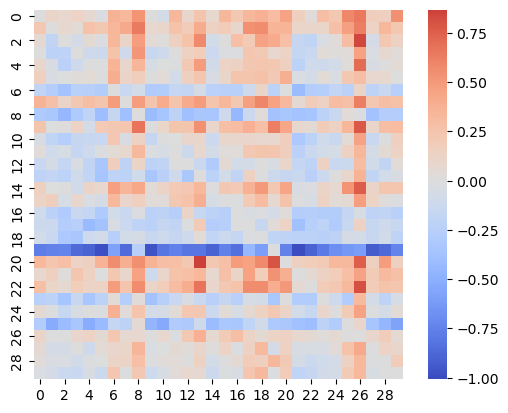

In [79]:
sns.heatmap(errors_scaled, square=True, center=0, cmap="coolwarm")

# Наиболее изменяющиеся воксели

In [43]:
sub = Sub('04')
lindelta = LinearDeltaModel(sub, 5, 1, 1000)
lindelta.fit()
lindelta.predict()
lindelta.evaluate()

In [92]:
delta_voxels = abs(lindelta.deltaY_train).sum(axis=1)

Text(0, 0.5, 'absolute delta sum')

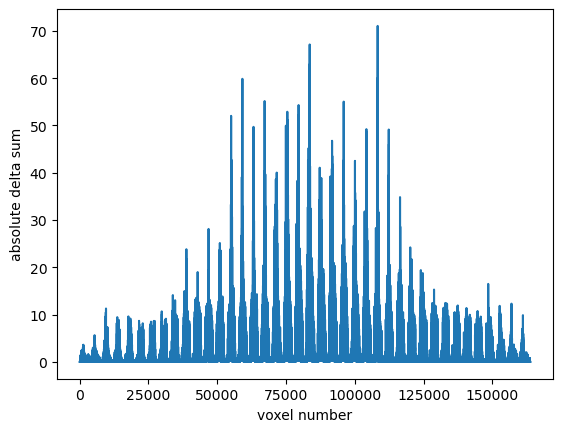

In [93]:
plt.plot(delta_voxels)
plt.xlabel('voxel number')
plt.ylabel('absolute delta sum')

In [94]:
bound = delta_voxels.max() / 2
delta_voxels_bounded = delta_voxels * (delta_voxels > bound)

In [95]:
d1, d2, d3 = lindelta._d1, lindelta._d2, lindelta._d3
delta_voxels = delta_voxels.reshape((d1, d2, d3))
mask = delta_voxels > bound

In [100]:
mask = mask.reshape(d1*d2*d3)
difference = lindelta.Y_test_predicted - np.delete(lindelta.Y_test, 0, 1)
MSE_test = utils.MSE(difference[np.nonzero(mask)])

In [102]:
lindelta.MSE_test

0.00010887398565506218

In [101]:
MSE_test

0.013244357500467974

In [103]:
# возвращает MSE_test, подсчитанный только на самых изменяющихся вокселях
def evaluate(lindelta: LinearDeltaModel):
    delta_voxels = abs(lindelta.deltaY_train).sum(axis=1)
    bound = delta_voxels.max() / 2
    mask = delta_voxels > bound
    difference = lindelta.Y_test_predicted - np.delete(lindelta.Y_test, 0, 1)
    MSE_test = utils.MSE(difference[np.nonzero(mask)])
    return MSE_test

In [107]:
t = np.linspace(0, 10, 20)

MSE = []
MSE_corrected = []
sub = Sub('04')

for dt in t:
    lindelta = LinearDeltaModel(vector_list, sub, dt, 8, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    MSE.append(lindelta.MSE_test)
    MSE_corrected.append(evaluate(lindelta))

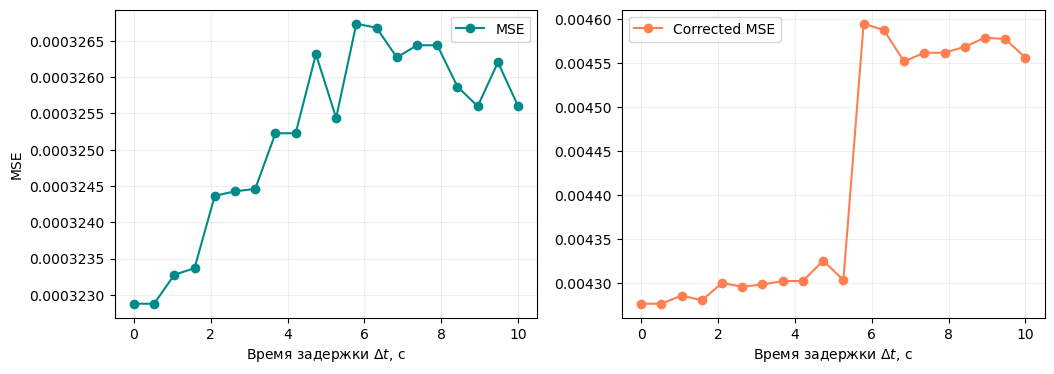

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(t, MSE, marker='o', color="darkcyan", label=r"MSE")
ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].grid(alpha=0.2)

ax[1].plot(t, MSE_corrected, marker='o', color="coral", label=r"Corrected MSE")
ax[1].set_xlabel("Время задержки $\Delta t$, с")
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.2)

In [119]:
t = np.linspace(0, 10, 20)
MSE_matrix = []
MSE_corrected_matrix = []

for number in Sub.subs_with_fmri:
    MSE = []
    MSE_corrected = []
    sub = Sub(number)
    for dt in t:
        lindelta = LinearDeltaModel(vector_list, sub, dt, 8, 1000)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE.append(lindelta.MSE_test)
        MSE_corrected.append(evaluate(lindelta))
    MSE_matrix.append(MSE)
    MSE_corrected_matrix.append(MSE_corrected)

MSE_matrix = np.array(MSE_matrix)
MSE_corrected_matrix = np.array(MSE_corrected_matrix)

In [120]:
MSE_means = MSE_matrix.mean(axis=0)
MSE_stds = MSE_matrix.std(axis=0)

In [121]:
MSE_corrected_means = MSE_corrected_matrix.mean(axis=0)
MSE_corrected_stds = MSE_corrected_matrix.std(axis=0)

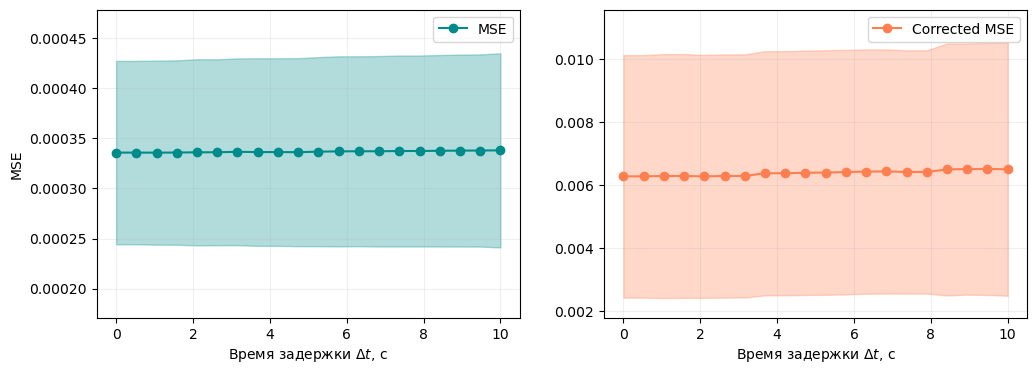

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(t, MSE_means, marker='o', color="darkcyan", label=r"MSE")
ax[0].fill_between(t, MSE_means - MSE_stds, MSE_means + MSE_stds, color="darkcyan", alpha = 0.3)
ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].set_ylim(0.7 * abs(MSE_means - MSE_stds).max(), 1.1 * abs(MSE_means + MSE_stds).max())
ax[0].legend()
ax[0].grid(alpha=0.2)

ax[1].plot(t, MSE_corrected_means, marker='o', color="coral", label=r"Corrected MSE")
ax[1].fill_between(t, MSE_corrected_means - MSE_corrected_stds, MSE_corrected_means + MSE_corrected_stds, color="coral", alpha = 0.3)
ax[1].set_xlabel("Время задержки $\Delta t$, с")
ax[1].set_ylim(0.7 * abs(MSE_corrected_means - MSE_corrected_stds).max(), 1.1 * abs(MSE_corrected_means + MSE_corrected_stds).max())
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.2)

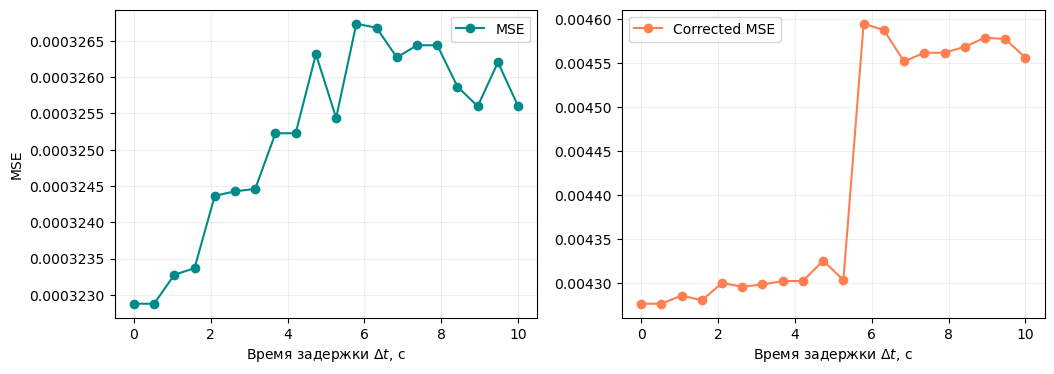

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(t, MSE_matrix[0], marker='o', color="darkcyan", label=r"MSE")
ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].grid(alpha=0.2)

ax[1].plot(t, MSE_corrected_matrix[0], marker='o', color="coral", label=r"Corrected MSE")
ax[1].set_xlabel("Время задержки $\Delta t$, с")
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.2)